<a href="https://colab.research.google.com/github/Erickson117/edd_1358_2021/blob/master/Proyecto_Probabilidad_y_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Erick Jesus Reyes Garcia
# Eduardo Perez Paz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#1.- 
Tabla = pd.read_csv("bebidas.csv",index_col = 0)
print("-----PRIMERAS 5 COMPRAS-----")
Tabla.head()



-----PRIMERAS 5 COMPRAS-----


,Edad,Temperatura,Bebida
0,17,13,0
1,4,15,0
2,44,11,1
3,37,14,0
4,37,25,1


In [31]:
print("-----ULTIMAS 5 COMPRAS-----")
Tabla.tail()

-----ULTIMAS 5 COMPRAS-----


,Edad,Temperatura,Bebida
995,17,17,0
996,57,12,1
997,82,5,1
998,61,5,1
999,44,3,0


-----DIAGRAMA DE DISPERSIÓN-----


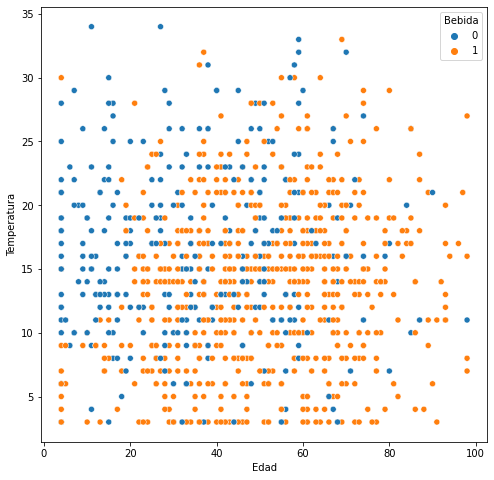

In [32]:
#2.-
print("-----DIAGRAMA DE DISPERSIÓN-----")
plt.figure(figsize=(8,8))
sns.scatterplot(x=Tabla.Edad, y=Tabla.Temperatura, hue= Tabla.Bebida)

In [35]:
# 3.- 
nueva_Tabla = Tabla
# edades menores de edad, mayores de edad y mayores de 60 representados con 0,1,2 respectivamente
for i in range(0,1000):
  if (Tabla.Edad[i] < 18):
    nueva_Tabla.Edad[i] = 0
  elif (Tabla.Edad[i] >= 18 and Tabla.Edad[i] < 60):
    nueva_Tabla.Edad[i] = 1
  else:
    nueva_Tabla.Edad[i] = 2
nueva_Tabla
# Temperaturas frias, templadas y calidas en orden de 0,1 y 2 respectivamente
for i in range(0,1000):
  if (Tabla.Temperatura[i] <= 10):
    nueva_Tabla.Temperatura[i] = 0
  elif (Tabla.Temperatura[i] > 10 and Tabla.Temperatura[i] < 20):
    nueva_Tabla.Temperatura[i] = 1
  else:
    nueva_Tabla.Temperatura[i] = 2


nueva_Tabla



,Edad,Temperatura,Bebida
0,0,1,0
1,0,1,0
2,1,1,1
3,1,1,0
4,1,2,1
...,...,...,...
995,0,1,0
996,1,1,1
997,2,0,1
998,2,0,1


In [43]:
#5.-
Bebida_fria = 0
Bebida_caliente = 0
for i in range(0,1000):
  if (nueva_Tabla.Bebida[i] == 0):
    Bebida_fria += 1
  else:
    Bebida_caliente += 1

Bebida_fria /= 1000
Bebida_caliente /= 1000

print(f"P(Z=fria):{Bebida_fria} \nP(Z=caliente):{Bebida_caliente}")

P(Z=fria):0.339 
P(Z=caliente):0.661


In [52]:

# posicion 0 menores de 18; posicion 1 mayores a 18 y menores a 60; posicion 2 mayores a 60
# posicion n,0 dia frio posicion n,1 dia templado posicion n,2 dia frio
evidenciaxy = [[0,0,0],[0,0,0],[0,0,0]]

for i in range(0,1000):
  evidenciaxy[nueva_Tabla.Edad[i]][nueva_Tabla.Temperatura[i]] += 1

for i in range(0,3):
  for k in range(0,3):
    evidenciaxy[i][k] /= 1000

print("Distribucion conjunta")
print(evidenciaxy)



Distribucion conjunta
[[0.036, 0.178, 0.077], [0.05, 0.309, 0.133], [0.028, 0.126, 0.063]]


In [56]:
# 7.1
# posicion 0 menores de 18; posicion 1 mayores a 18 y menores a 60; posicion 2 mayores a 60
# posicion n,0 dia frio posicion n,1 dia templado posicion n,2 dia frio
#posicion n,k,0 bebida fria, posicion n,k,1 bebida caliente 
evidenciaxyz = [[[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0]],[[0,0],[0,0],[0,0]]]

for i in range(0,1000):
 evidenciaxyz[nueva_Tabla.Edad[i]][nueva_Tabla.Temperatura[i]][nueva_Tabla.Bebida[i]] += 1

for i in range(0,3):
  for k in range(0,3):
    for e in range(0,2):
      evidenciaxyz[i][k][e] /= 1000

print("P(X ∩ Y ∩ Z),")
print(evidenciaxyz)

print("P(X ∩ Y|Z)")
for i in range(0,3):
  for k in range(0,3):
    for e in range(0,2):
      if (e == 0):
        evidenciaxyz[i][k][e] /= Bebida_fria
      else:
        evidenciaxyz[i][k][e] /= Bebida_caliente
print(evidenciaxyz)

P(X ∩ Y ∩ Z),
[[[0.016, 0.02], [0.047, 0.003], [0.027, 0.001]], [[0.043, 0.135], [0.11, 0.199], [0.061, 0.065]], [[0.008, 0.069], [0.014, 0.119], [0.013, 0.05]]]
P(X ∩ Y|Z)
[[[0.0471976401179941, 0.030257186081694403], [0.13864306784660765, 0.0045385779122541605], [0.07964601769911504, 0.0015128593040847202]], [[0.12684365781710913, 0.2042360060514372], [0.3244837758112094, 0.3010590015128593], [0.1799410029498525, 0.09833585476550681]], [[0.02359882005899705, 0.1043872919818457], [0.04129793510324484, 0.18003025718608168], [0.0383480825958702, 0.07564296520423601]]]


In [77]:

print(f"Nuevo cliente")
print("Edad: ")
edad = input()
print("Temperatura: ")
temperatura=input()
if (edad == "menor"):
  edad = 0
elif (edad == "adulto"):
  edad = 1
elif (edad == "mayor"):
  edad = 2
else:
  try:
    edad = int(edad)
    if (edad < 18 ):
      edad = 0
    if (edad >= 18 and edad < 60):
      edad = 1
    else:
      edad = 2
  except:
    edad = 1

if (temperatura == "frio"):
  temperatura = 0
elif (temperatura == "templado"):
  temperatura = 1
elif (temperatura == "calido"):
  temperatura = 2
else:
  try:
    temperatura = int(temperatura)
    if (temperatura <= 10):
      temperatura = 0
    elif (temperatura > 10 and temperatura < 20):
      temperatura = 1
    else:
      temperatura = 2
  except:
    temperatura = 1
  

probabilidad_sugerencia_fria = (Bebida_fria * evidenciaxyz[edad][temperatura][0]) / evidenciaxy[edad][temperatura]
probabilidad_sugerencia_caliente = (Bebida_fria * evidenciaxyz[edad][temperatura][1]) / evidenciaxy[edad][temperatura]
    
if (probabilidad_sugerencia_fria < probabilidad_sugerencia_caliente):
  print(f"La sugerencia es: Caliente")
else:
  print(f"la sugerencia es: Fria")

Nuevo cliente
Edad: 
joven
Temperatura: 
fria
la sugerencia es: Fria
